In [57]:
from sklearn.neural_network import MLPClassifier
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from PIL import Image

In [10]:
ds = load_dataset('ylecun/mnist')

print(ds)

Generating test split: 100%|██████████| 10000/10000 [00:00<00:00, 393901.64 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [14]:
ds['train'].to_pandas().info()
ds['test'].to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   60000 non-null  object
 1   label   60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [21]:
def preprocess(batch):
    preprocess_images = []

    for img in batch['image']:
        arr = np.array(img, dtype=np.float32)
        arr = arr/255.0
        arr = arr.reshape(-1)
        preprocess_images.append(arr)
    
    return {
        'image' : preprocess_images,
        'label' : batch['label']
    }

ds = ds.map(preprocess, batched=True, remove_columns=['image'])
print(ds)


Map: 100%|██████████| 10000/10000 [00:07<00:00, 1267.13 examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [34]:
X_train = np.stack(ds["train"]["image"]).squeeze(-1) 
y_train = np.array(ds["train"]["label"])


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=10000, shuffle=True, random_state=42
)

X_test  = np.stack(ds["test"]["image"]).squeeze(-1)
y_test  = np.array(ds["test"]["label"])


In [38]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[5, 2], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.802
Test accuracy:  0.8153


In [58]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[2], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.6794
Test accuracy:  0.6859


In [36]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[5, 5, 2], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.8353
Test accuracy:  0.8414


In [37]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[5, 5, 5, 5], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.8491
Test accuracy:  0.8615


In [39]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[20, 5, 2], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.8842
Test accuracy:  0.887


In [40]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[20, 20, 20, 20], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.9446
Test accuracy:  0.9466


In [41]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=[100, 100, 100, 100], activation='relu', solver='sgd', alpha=0.1, random_state=42, max_iter=1000))
])

clf.fit(X_train, y_train)

print('Val accuracy: ', clf.score(X_val, y_val))
print('Test accuracy: ', clf.score(X_test, y_test))

Val accuracy:  0.9684
Test accuracy:  0.97


/home/meu1404/miniforge/envs/rapids-ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [42]:
y_pred = clf.predict(X_test)

y_true = y_test.astype(np.int32)
y_pred =y_pred.astype(np.int32)

y_score = None
try:
    s = clf.decision_function(X_test)
    y_score = s.reshape(-1)
except Exception:
    try:
        proba = clf.predict_proba(X_test)
        if proba.ndim == 2 and proba.shape[1] >= 2:
            y_score = proba[:, 1].astype(np.float32)
    except Exception:
        y_score = None

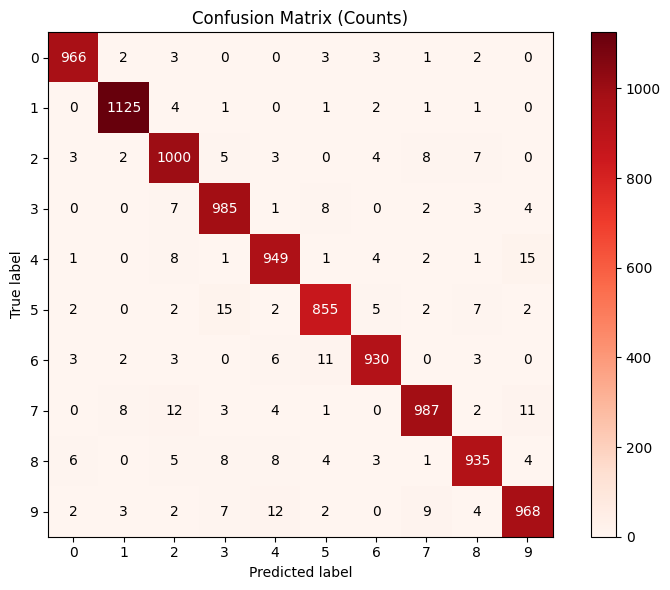

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred, labels=list(range(10)))

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix (Counts)")
plt.colorbar() 

tick_marks = range(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()